<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/2_Advanced/08_Pandas_Concat_DataFrames.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Pandas Concat DataFrames

Load data.

In [30]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

## Notes

* `concat()`: Combine DataFrames by rows (axis = 0) or columns (axis=1). 
* Sticks the DataFrames together without using any keys. 

## Examples

### Example 1

This is a simple DataFrame with two job postings data. The first is from January the second is from February. We'll use `concat()` to concatenate these two DataFrames. 

In [31]:
# Sample dataset of job postings in January
job_postings_jan = pd.DataFrame({
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Scientist', 'Data Engineer'],
    'company': ['Company A', 'Company B', 'Company C', 'Company D', 'Company E'],
    'job_posted_date': pd.to_datetime(['2024-01-02', '2024-01-07', '2024-01-14', '2024-01-19', '2024-01-24'])
})

job_postings_jan

,job_id,job_title,company,job_posted_date
0,1,Data Scientist,Company A,2024-01-02
1,2,Data Analyst,Company B,2024-01-07
2,3,Machine Learning Engineer,Company C,2024-01-14
3,4,Data Scientist,Company D,2024-01-19
4,5,Data Engineer,Company E,2024-01-24


In [32]:
# Sample dataset of job postings in February
job_postings_feb = pd.DataFrame({
    'job_id': [6, 7, 8, 9, 10],
    'job_title': ['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Scientist', 'Data Engineer'],
    'company': ['Company F', 'Company G', 'Company H', 'Company I', 'Company J'],
    'job_posted_date': pd.to_datetime(['2024-02-05', '2024-02-09', '2024-02-12', '2024-02-18', '2024-02-22'])
})

job_postings_feb

,job_id,job_title,company,job_posted_date
0,6,Data Scientist,Company F,2024-02-05
1,7,Data Analyst,Company G,2024-02-09
2,8,Machine Learning Engineer,Company H,2024-02-12
3,9,Data Scientist,Company I,2024-02-18
4,10,Data Engineer,Company J,2024-02-22


In [33]:
# Concatenate the two DataFrames
job_postings_combined = pd.concat([job_postings_jan, job_postings_feb], ignore_index=True)

job_postings_combined

,job_id,job_title,company,job_posted_date
0,1,Data Scientist,Company A,2024-01-02
1,2,Data Analyst,Company B,2024-01-07
2,3,Machine Learning Engineer,Company C,2024-01-14
3,4,Data Scientist,Company D,2024-01-19
4,5,Data Engineer,Company E,2024-01-24
5,6,Data Scientist,Company F,2024-02-05
6,7,Data Analyst,Company G,2024-02-09
7,8,Machine Learning Engineer,Company H,2024-02-12
8,9,Data Scientist,Company I,2024-02-18
9,10,Data Engineer,Company J,2024-02-22


### Example 2

Now looking at our dataset. Similarly to the last section, let's filter for Data Analysts and then create a column for the month. Then we'll filter for March and April job postings and concatenate these two.

**Note**: This problem is only for demonstration purposes it's not very useful right now.

#### Steps

1. Create a column for month.

In [34]:
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%b')

2. Create dataframes for each month.

In [35]:
# make data frame for each month using a loop
months = df['job_posted_month'].unique()

# write this with dict comprehension
dict_months = {month: df[df['job_posted_month'] == month] for month in months}

# long way
# dict_months = {}
# for month in months:
#     dict_months[month] = df[df['job_posted_month'] == month]

type(dict_months)

dict

In [36]:
dict_months['Jan']

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
24,Data Scientist,Spezialist Data Management,"Vienna, Austria",via BeBee,Full-time,False,Austria,2023-01-08 07:15:50,False,False,Austria,None,NaN,NaN,Santander Consumer Bank,"['sas', 'sas', 'sql']","{'analyst_tools': ['sas'], 'programming': ['sa...",Jan
27,Senior Data Engineer,SENIOR DATA ENGINEER,"Gaydon, Warwick, UK",via My ArkLaMiss Jobs,Full-time,False,United Kingdom,2023-01-16 07:54:17,True,False,United Kingdom,None,NaN,NaN,Jaguar Land Rover,"['python', 'sql', 'no-sql', 'bigquery', 'airfl...","{'analyst_tools': ['tableau', 'looker', 'power...",Jan
36,Data Scientist,Data Scientist,"Manchester, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-20 07:57:09,False,False,United Kingdom,None,NaN,NaN,Wejo,"['python', 'scala', 'sql', 'r', 'hadoop', 'spa...","{'libraries': ['hadoop', 'spark'], 'programmin...",Jan
55,Business Analyst,Business Analyst at Lipa Later,"Nairobi, Kenya",via BeBee Kenya,Full-time,False,Kenya,2023-01-31 07:58:54,False,False,Kenya,None,NaN,NaN,Lipa Later,"['python', 'r', 'sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",Jan
56,Data Engineer,Data Engineer,Anywhere,via EchoJobs,Full-time,True,"New York, United States",2023-01-08 07:04:55,False,True,United States,year,120000.0,NaN,BioIntelliSense,"['sql', 'python', 'databricks', 'spark', 'airf...","{'cloud': ['databricks'], 'libraries': ['spark...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787622,Software Engineer,Azure DevOps Engineer,"Mexico City, CDMX, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-01-14 06:23:06,True,False,Mexico,None,NaN,NaN,"IDC Technologies, Inc.",['azure'],{'cloud': ['azure']},Jan
787623,Data Analyst,Data Analyst,California,via Trabajo.org,Full-time,False,"California, United States",2023-01-17 06:17:12,False,False,United States,None,NaN,NaN,Blue Shield of CA,"['sas', 'sas', 'excel', 'powerpoint', 'tableau']","{'analyst_tools': ['sas', 'excel', 'powerpoint...",Jan
787624,Software Engineer,Senior Software Engineer- Integrations (Remote),Netherlands,via Startup Jobs,Full-time,False,Netherlands,2023-01-10 06:16:43,True,False,Netherlands,None,NaN,NaN,ClickHouse,"['java', 'go', 'python', 'typescript']","{'programming': ['java', 'go', 'python', 'type...",Jan
787627,Data Engineer,Data Engineer,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-01-14 06:14:21,False,False,India,None,NaN,NaN,One Degree North HR Services,"['python', 'sql', 'nosql', 'oracle', 'selenium...","{'cloud': ['oracle'], 'libraries': ['selenium'...",Jan


3. Concatenate the first quarter

In [37]:
quarter_1 = [dict_months['Jan'], dict_months['Feb'], dict_months['Mar']]

df_q1 = pd.concat(quarter_1, ignore_index=True)

df_q1

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Data Scientist,Spezialist Data Management,"Vienna, Austria",via BeBee,Full-time,False,Austria,2023-01-08 07:15:50,False,False,Austria,None,NaN,NaN,Santander Consumer Bank,"['sas', 'sas', 'sql']","{'analyst_tools': ['sas'], 'programming': ['sa...",Jan
1,Senior Data Engineer,SENIOR DATA ENGINEER,"Gaydon, Warwick, UK",via My ArkLaMiss Jobs,Full-time,False,United Kingdom,2023-01-16 07:54:17,True,False,United Kingdom,None,NaN,NaN,Jaguar Land Rover,"['python', 'sql', 'no-sql', 'bigquery', 'airfl...","{'analyst_tools': ['tableau', 'looker', 'power...",Jan
2,Data Scientist,Data Scientist,"Manchester, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-20 07:57:09,False,False,United Kingdom,None,NaN,NaN,Wejo,"['python', 'scala', 'sql', 'r', 'hadoop', 'spa...","{'libraries': ['hadoop', 'spark'], 'programmin...",Jan
3,Business Analyst,Business Analyst at Lipa Later,"Nairobi, Kenya",via BeBee Kenya,Full-time,False,Kenya,2023-01-31 07:58:54,False,False,Kenya,None,NaN,NaN,Lipa Later,"['python', 'r', 'sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",Jan
4,Data Engineer,Data Engineer,Anywhere,via EchoJobs,Full-time,True,"New York, United States",2023-01-08 07:04:55,False,True,United States,year,120000.0,NaN,BioIntelliSense,"['sql', 'python', 'databricks', 'spark', 'airf...","{'cloud': ['databricks'], 'libraries': ['spark...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220971,Senior Data Engineer,(Senior) Data Engineer (m/w/d) - PUBLIC BW / C...,"Leinfelden-Echterdingen, Jerman",melalui Monster.de,Pekerjaan tetap,False,Germany,2023-03-13 06:18:59,False,False,Germany,None,NaN,NaN,"CGI Group, Inc.","['python', 'sql', 'azure', 'aws', 'hadoop', 's...","{'cloud': ['azure', 'aws'], 'libraries': ['had...",Mar
220972,Data Analyst,Lead Data Analyst,Jerman,melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,Amtrak,"['vba', 'sql', 'python', 'excel', 'sap', 'shar...","{'analyst_tools': ['excel', 'sap', 'sharepoint...",Mar
220973,Data Engineer,Lead Data Engineer,"Frankfurt am Main, Jerman",melalui Top County Careers,Pekerjaan tetap,False,Germany,2023-03-13 06:18:59,False,False,Germany,None,NaN,NaN,Tiro Partners Limited,"['python', 'sql', 'scala', 'java', 'javascript...","{'analyst_tools': ['sas', 'tableau', 'power bi...",Mar
220974,Software Engineer,Lead Solutions Design Engineer,"San Juan, Puerto Riko",melalui BeBee Puerto Rico,Pekerjaan tetap,False,Puerto Rico,2023-03-12 06:31:19,False,False,Puerto Rico,None,NaN,NaN,Ryder,"['excel', 'powerpoint', 'tableau']","{'analyst_tools': ['excel', 'powerpoint', 'tab...",Mar


4. Inspecting to confirm

<Axes: xlabel='job_posted_month'>

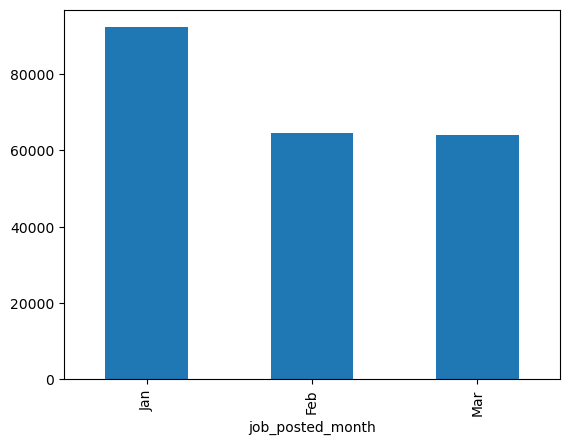

In [38]:
df_q1['job_posted_month'].value_counts().plot(kind='bar')